# Biodata

**Fida Mardliyah // fidamardliyah11@gmail.com**


# Import Data

In [1]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-24 21:04:54--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.91MB/s    in 90s     

2021-07-24 21:06:25 (3.42 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



# Unzip Data

In [3]:
import zipfile,os
filezip = '/tmp/rockpaperscissors.zip'
filezip_ref = zipfile.ZipFile(filezip, 'r')
filezip_ref.extractall('/datacoba')
filezip_ref.close()

In [4]:
os.listdir('/datacoba/rockpaperscissors')

['rps-cv-images', 'scissors', 'rock', 'README_rpc-cv-images.txt', 'paper']

In [5]:
filebase_dir = '/datacoba/rockpaperscissors/rps-cv-images'

In [6]:
paper_dir = os.path.join("/datacoba/rockpaperscissors/rps-cv-images/paper")
rock_dir = os.path.join("/datacoba/rockpaperscissors/rps-cv-images/rock")
scissors_dir = os.path.join("/datacoba/rockpaperscissors/rps-cv-images/scissors")

In [7]:
jmlpaper= len(os.listdir(paper_dir))
jmlrock = len(os.listdir(rock_dir))
jmlscissors = len(os.listdir(scissors_dir))

# Mencetak jumlah data rock paper scissor
print(jmlpaper)
print(jmlrock)
print(jmlscissors)

712
726
750


# Augmentasi Image

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range = 50,
                    horizontal_flip =True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4
)

test_gen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range = 50,
                    horizontal_flip =True,
                    shear_range = 0.2,
                    zoom_range = 0.2,
                    fill_mode = 'wrap',
                    validation_split = 0.4
)

# Generator Image

In [9]:
train_generator = train_gen.flow_from_directory(
    filebase_dir,
    target_size = (100,150),
    class_mode = 'categorical',
    batch_size = 8,
    subset = 'training'
)

val_generator = test_gen.flow_from_directory(
    filebase_dir,
    target_size = (100,150),
    class_mode = "categorical",
    batch_size = 8,
    subset = "validation"
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# Modelling

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

## Sequential

In [11]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(100, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),
    Dense(512, activation='relu'),
    Dense(3, activation='softmax')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 148, 32)       896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 15, 128)        1

## Compile Optimizer

In [13]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

## Callbacks

In [14]:
class mycb(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=None):
    if(logs.get('accuracy') >= 0.97):  # berhenti training ketika accuracy diatas 97%
      print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'stop training.'),
      self.model.stop_training = True

# Training

In [21]:
fitmodel = model.fit(
      train_generator,
      steps_per_epoch = 25,  
      epochs = 50, 
      validation_data = val_generator, 
      validation_steps=5,  
      verbose=2,   
      callbacks = [mycb()]
)

Epoch 1/50
25/25 - 8s - loss: 0.2288 - accuracy: 0.9200 - val_loss: 0.2181 - val_accuracy: 0.9250
Epoch 2/50
25/25 - 7s - loss: 0.2837 - accuracy: 0.8800 - val_loss: 0.2415 - val_accuracy: 0.8750
Epoch 3/50
25/25 - 8s - loss: 0.3104 - accuracy: 0.8850 - val_loss: 0.2393 - val_accuracy: 0.9250
Epoch 4/50
25/25 - 7s - loss: 0.3065 - accuracy: 0.8800 - val_loss: 0.3475 - val_accuracy: 0.8750
Epoch 5/50
25/25 - 8s - loss: 0.2253 - accuracy: 0.9250 - val_loss: 0.1204 - val_accuracy: 0.9750
Epoch 6/50
25/25 - 7s - loss: 0.2330 - accuracy: 0.9200 - val_loss: 0.3257 - val_accuracy: 0.8750
Epoch 7/50
25/25 - 8s - loss: 0.2410 - accuracy: 0.9200 - val_loss: 0.1338 - val_accuracy: 0.9750
Epoch 8/50
25/25 - 7s - loss: 0.1514 - accuracy: 0.9400 - val_loss: 0.3980 - val_accuracy: 0.8750
Epoch 9/50
25/25 - 7s - loss: 0.1736 - accuracy: 0.9450 - val_loss: 0.1659 - val_accuracy: 0.9500
Epoch 10/50
25/25 - 7s - loss: 0.1997 - accuracy: 0.9400 - val_loss: 0.0738 - val_accuracy: 1.0000
Epoch 11/50
25/25 -

# Plot Perbandingan

In [22]:
import matplotlib.pyplot as plt

## Accuracy

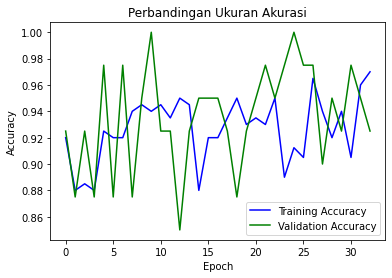

<Figure size 432x288 with 0 Axes>

In [23]:
epochs = range(len(fitmodel.history['accuracy']))

plt.plot(epochs, fitmodel.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(fitmodel.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Perbandingan Ukuran Akurasi')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

## Loss

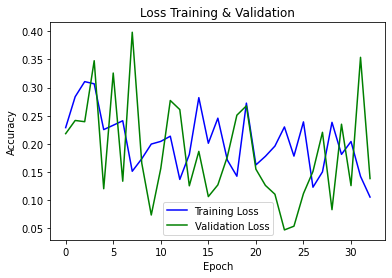

<Figure size 432x288 with 0 Axes>

In [24]:
plt.plot(epochs, fitmodel.history['loss'], label='Training Loss', color='blue')
plt.plot(epochs, fitmodel.history['val_loss'], label='Validation Loss', color = 'green')
plt.title('Loss Training & Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc=0)
plt.figure()

plt.show()

# Testing

In [25]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline

Saving WhatsApp Image 2021-07-25 at 03.42.51.jpeg to WhatsApp Image 2021-07-25 at 03.42.51 (7).jpeg
WhatsApp Image 2021-07-25 at 03.42.51.jpeg
This Image is : Rock


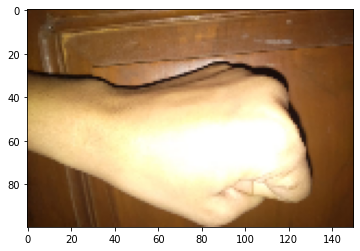

In [28]:
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  imgnew = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(imgnew)
  x = image.img_to_array(imgnew)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=8)
  
  print(fn)
  if classes[0][0] == 1:
    print('This Image is : Rock')
  elif classes[0][1] == 1:
    print('This Image is : Paper')
  else:
    print('This Image is : Scissor')